In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as spi
%matplotlib inline
%run pca
%run femshape
%run utils
%run monomials.py

In [129]:
# Arianna's ones
leaves = np.genfromtxt('../../AllPots/Data/Leaves/Leaves_Final_Coords_Scaled.csv', delimiter=',')
nleaves = len(leaves)
leaves = leaves.reshape(nleaves,200,2)
#print(np.shape(leaves
# Put inside -1:1
leaves = leaves/2

# Now we need the Karcher means
km = np.zeros((15,200,2))

for i in range(15):
    k = np.loadtxt("/home/marslast/Dropbox/Transfer/Pots/Results1120/Leaves_KM/Karcher_Mean_Leaves_"+str(i+1)+".csv",skiprows=1,delimiter=',')
    k = k[:,:2]
    k /= 1.2*max(np.max(k[:,0]),-np.min(k[:,0]),np.max(k[:,1]),-np.min(k[:,1]))
    km[i,:,:] = k
    
#leaves = np.concatenate([leaves,km])

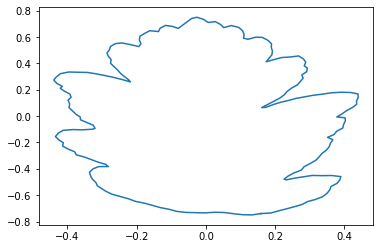

In [130]:
pl.plot(leaves[127,:,0],leaves[127,:,1])

In [16]:
# Loop over several choices of parameter and save them
# This is the full currents
for o in [1,2,4]:
    for m in [16,18,24]:
        for l in [1,2,3]:
            space = Space(order=o, meshsize=m,L=l)
            currents = [Current(space, leaf) for leaf in leaves]
            reps = [Representer(current, scale=.01) for current in currents]
            uv = np.array([rep.get(order=3) for rep in reps])
            uv = uv.reshape(len(reps),-1,order='F')
            np.shape(uv)
            dist = np.zeros((nleaves,nleaves))
            for i in range(nleaves):
                for j in range(i,nleaves):
                    dist[i,j] = np.linalg.norm(uv[i,:]-uv[j,:])
            #np.where(dist!=0)
            fname = 'LeavesData_currents2_'+str(o)+'_'+str(m)+'_'+str(l)+'.csv'
            np.savetxt(fname,dist)

In [ ]:
# This is PCA
for o in [1,2,4]:
    for m in [16,18,24]:
        for l in [1,2,3]:
            space = Space(order=o, meshsize=m,L=l)
            currents = [Current(space, leaf) for leaf in leaves]
            reps = [Representer(current, scale=.01) for current in currents]
            pe = pca_data(reps)
            pca_reps = PCA(pe, leaves[:,:,0], leaves[:,:,1],ncomp=20)
            embedding = np.zeros((nleaves,20))
            #for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
            for i in range(nleaves): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
                embedding[i,:] = pca_reps.pr[i]
                #pl.plot(embedding[:,0],embedding[:,1],'.')
            dist = np.zeros((nleaves,nleaves))
            for i in range(nleaves):
                for j in range(i,nleaves):
                    dist[i,j] = np.linalg.norm(embedding[i,:]-embedding[j,:])

            #np.savetxt('FullData_currents_pca_24_dists'+'.csv',dist)
            fname = 'LeavesData_currents_pca2_'+str(o)+'_'+str(m)+'_'+str(l)+'.csv'
            np.savetxt(fname,dist)

In [83]:
# Just run one set of parameters
space = Space(order=1, meshsize=18,L=2)
currents = [Current(space, leaf) for leaf in leaves]
reps = [Representer(current, scale=.01) for current in currents]
peR = pca_data(reps)
pca_reps = PCA(peR, leaves[:,:,0], leaves[:,:,1],ncomp=2)

In [49]:
import pandas as pd
df = pd.read_csv('/home/marslast/Projects/AllPots/Data/Leaves/Leaves_Metadata.csv')
df.head()
df = df.iloc[:,[4,6]]
df = df.drop_duplicates()
nshapes = len(df)
print(nshapes)
print(np.unique(df.iloc[:,0]))

#np.savetxt('leaf_list.txt',df)

ModuleNotFoundError: No module named 'pandas'

In [144]:
# This sets up the colours for PCA plotting

ind = np.loadtxt('/home/marslast/Projects/AllPots/Code/leaf_list.txt')
cl = np.unique(ind[:,0]).astype(int)
#ind2 = np.zeros((15,2))
#ind2[:,0] = np.arange(15)+1
#ind2[:,1] = np.arange(np.shape(ind)[0]+1,np.shape(ind)[0]+16)
#ind = np.concatenate([ind,ind2])
#print(cl)

import matplotlib.colors as plc
cmap = pl.cm.get_cmap('inferno')
cnorm = plc.Normalize(vmin=0.0,vmax=len(cl))
colours = {}

count = 0
for i in cl:
    colours[i] = cmap((cnorm(count)))
    count += 1

def plotpca(pca,x,y,scaling=None,shift=None):
    pl.figure(figsize=(20,20));
    if scaling is None:
        scaling=1
    print(scaling)
    if shift is None:
        shift = np.array([0,0])
    for i, (pr, x, y) in enumerate(zip(pca, x,y)):
         pl.plot(-pr[0],pr[1],'.',color=colours[int(ind[i,0])],markersize=10);
    for i in range(len(cl)):
        which = np.where(ind[:,0]==i+1)
        mean = np.squeeze(np.median(pca[which,:],axis=1))
        pl.plot(-mean[0]+ km[i,:,0]/scaling,mean[1] + km[i,:,1]/scaling,color=colours[i+1],linewidth=3);
                        
            #pl.text(-pr[0]+shift[0],pr[1]+shift[1],i, bbox={'facecolor':'white', 'edgecolor': 'white', 'alpha':.5});


(440, 2)
0.2


<Figure size 1440x1440 with 0 Axes>

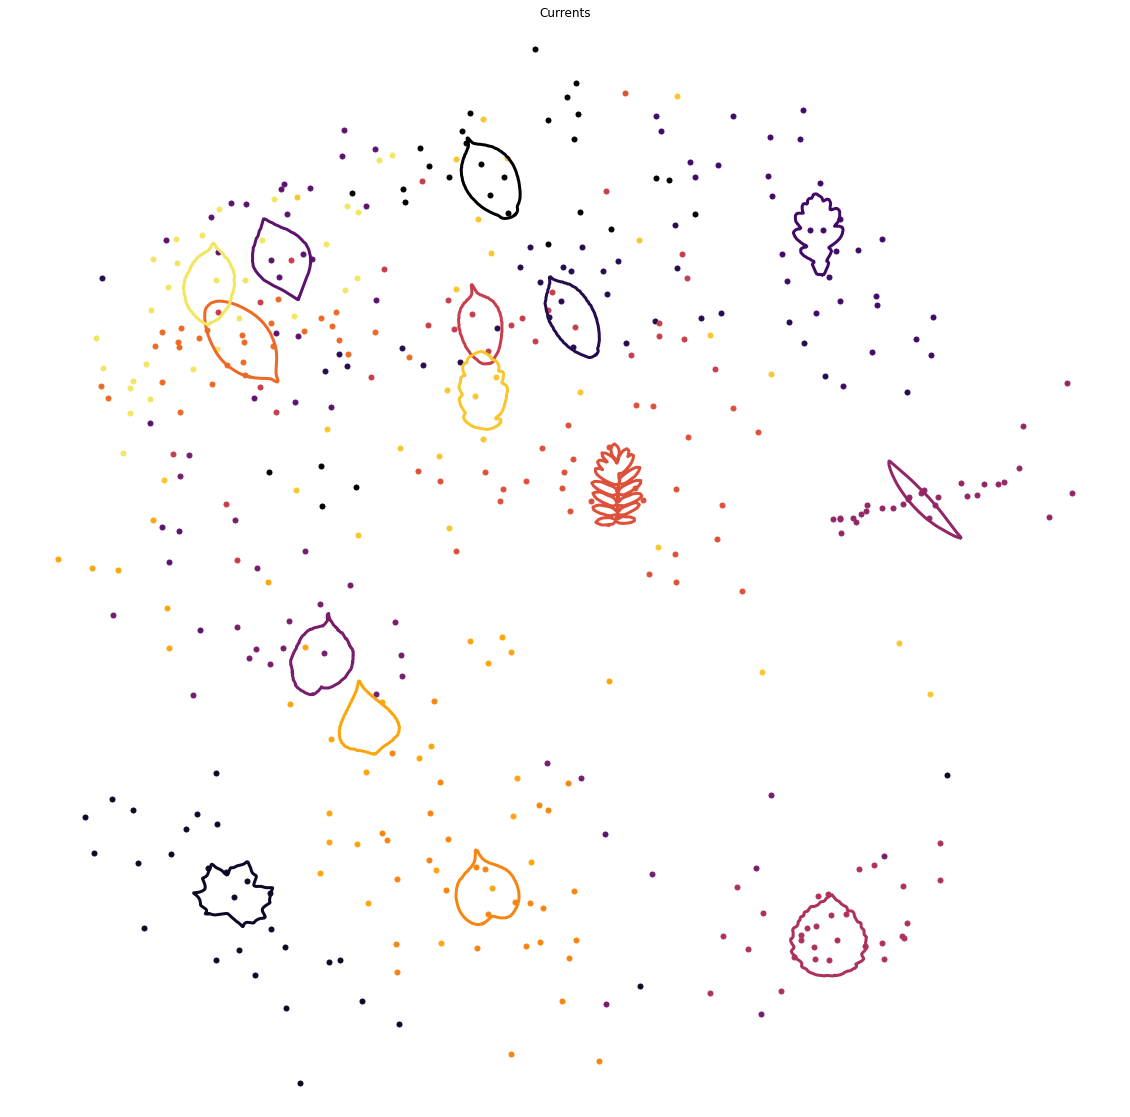

In [148]:
# Beware: the optimisation takes forever!
#peR2 = pca_opt(pca_reps, scaling=2,plot=False)
#np.savetxt('leavesPCA.txt',peR2)
peR2 = np.loadtxt('leavesPCA.txt')
print(np.shape(peR2))
pl.figure(figsize=(20,20))
plotpca(peR2,leaves[:,:,0],leaves[:,:,1],scaling=0.2)
pl.axis('equal')
pl.axis('off')
pl.title('Currents')
pl.savefig('Currents_leaves_PCA.pdf',dpi=600)

100


(-0.17306346496878763,
 0.32634135661903113,
 -0.4233070672327954,
 0.334317260939719)

<Figure size 1440x1440 with 0 Axes>

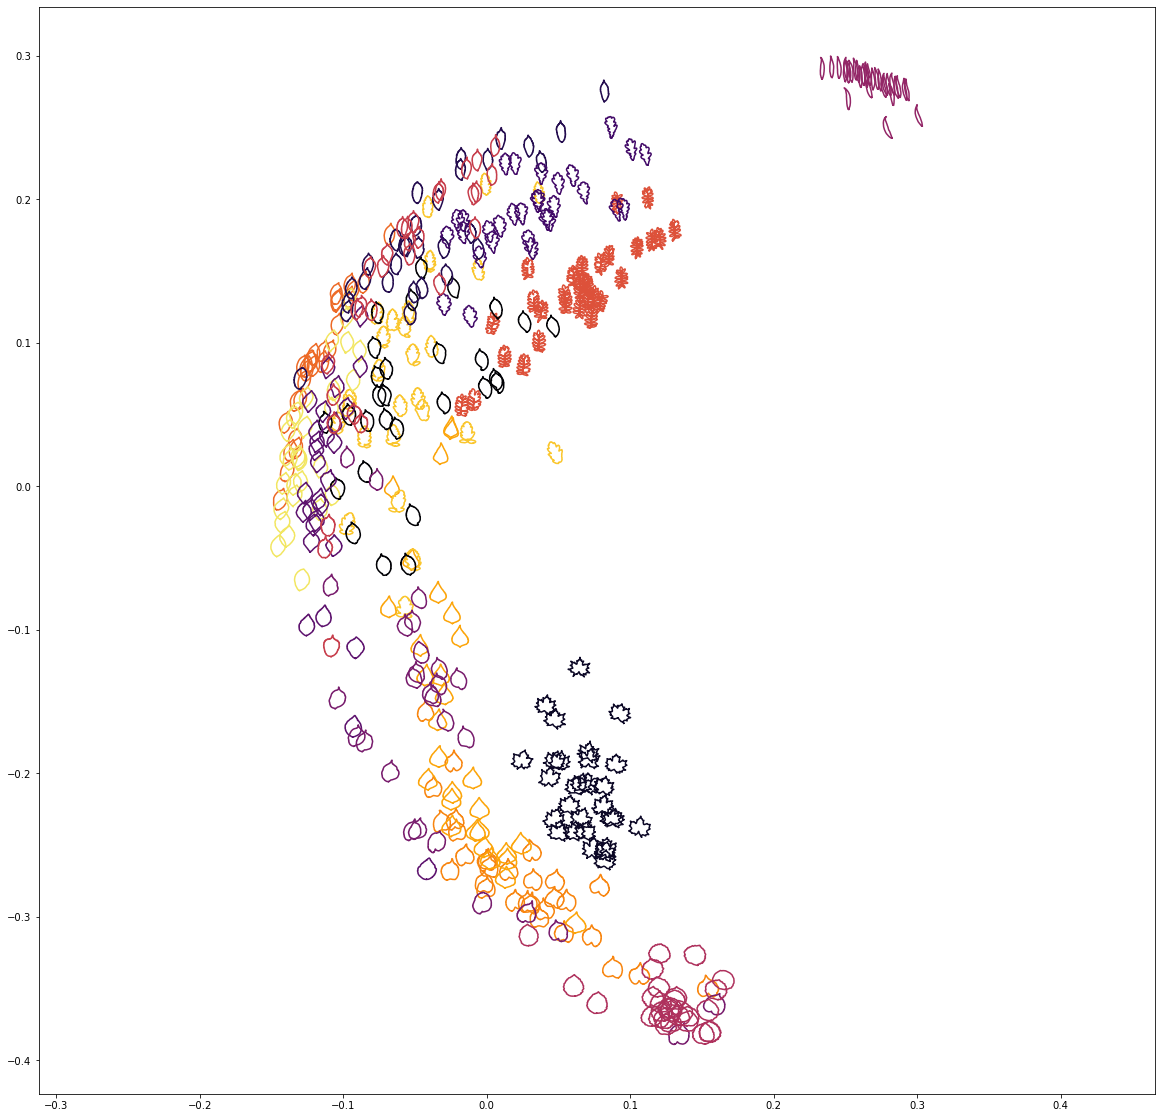

In [11]:
pe = monomial_current_pca(leaves[:,:,0], leaves[:,:,1], 10)
pcaM = PCA(pe, leaves[:,:,0], leaves[:,:,1])
pl.figure(figsize=(20,20))
plotpca(pcaM.pr,leaves[:,:,0],leaves[:,:,1],scaling=100)
pl.axis('equal')

10


<Figure size 1440x1440 with 0 Axes>

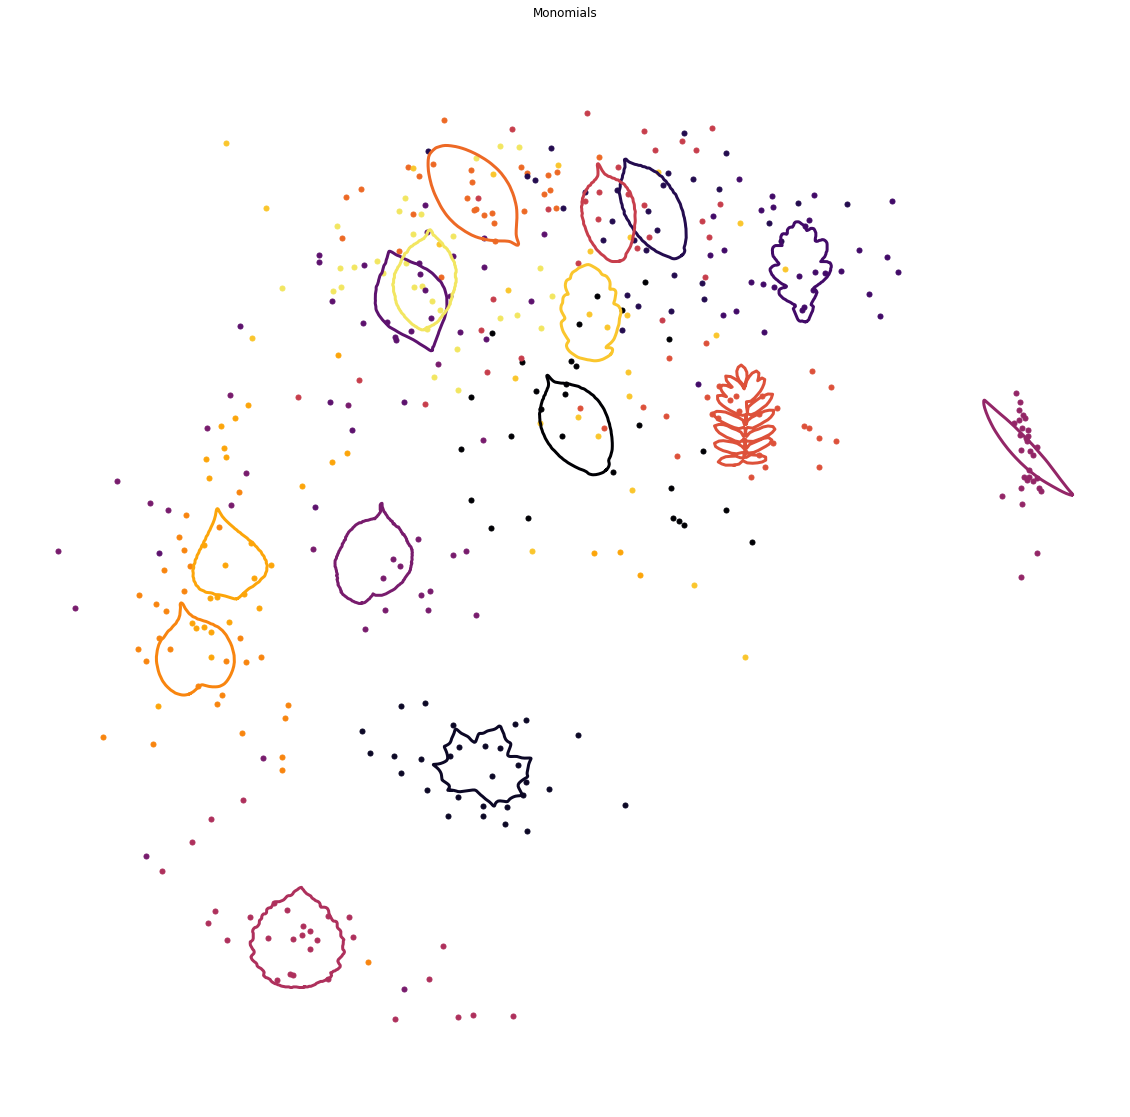

In [149]:
#peM2 = pca_opt(pcaM, scaling=2,plot=False)
#np.savetxt('leavesPCA_M.txt',peM2)
peM2 = np.loadtxt('leavesPCA_M.txt')
pl.figure(figsize=(20,20))
plotpca(peM2,leaves[:,:,0],leaves[:,:,1],scaling=10)
pl.axis('equal')
pl.axis('off')
pl.title('Monomials')
pl.savefig('Monomials_leaves_PCA.pdf',dpi=600)

![gg](spherical-cow2.png)

![hh](http://soilbugs.massey.ac.nz/images/IMGP1984.jpg)